
Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Ejercicios del capítulo 2. Getting to know your data.

Presenta: Ana Maritza Bello

---

In [89]:
import warnings
warnings.filterwarnings('ignore')

2.1 Proporcione tres medidas estadísticas adicionales de uso común que no estén
ilustradas en este capítulo para la caracterización de la dispersión de datos.
Analice cómo se pueden calcular de manera eficiente en bases de datos grandes.

Respuesta

1. Varianza. Es una medida de sipersión que representa la variabilidad de una
   serie de datos respecto de su media. Se calcula con la siguiente ecuación:
   $$\sigma^2 = \frac{\sum_1^N (x_i-\bar{X}^2)}{N}$$
1. Desviación estándar. Esta medida nos ofrece información de la dispersión de
   los datos respecto a la media. La desviación estándar es la raíz cuadrada de
   la varianza:
   $$\sigma = \sqrt{\frac{\sum_1^N (x_i-\bar{X}^2)}{N}}$$
1. Coeficiente de variación. Hace referencia a la relación entre el tamaño de la
   media y la variabilidad de la variable.
   $$ C_V = \frac{\sigma}{\bar{x}}$$
   Se puede sacar en porcentaje calculando:
   $$ C_V = \frac{\sigma}{\bar{x}} \cdot 100$$

2.2 Supongamos que los datos a analizar incluyen el atributo edad. Los valores de edad para las tuplas de datos son (en orden creciente) `13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70`.

¿Cuál es la media y mediana de los datos?

In [90]:
import pandas as pd

lista = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
edad = pd.DataFrame(lista)

# Media
print("Media:", edad[0].mean())

# Mediana
print("Mediana:", edad[0].median())


Media: 29.962962962962962
Mediana: 25.0


¿Cuál es la moda de los datos? (bimodal, trimodal)


Es bimodal, ya que las edades de 25 y 35 se repiten la misma cantidad de veces,
es decir 4. Esto se puede observar en el siguiente histograma.

Text(0.5, 0, 'Edades')

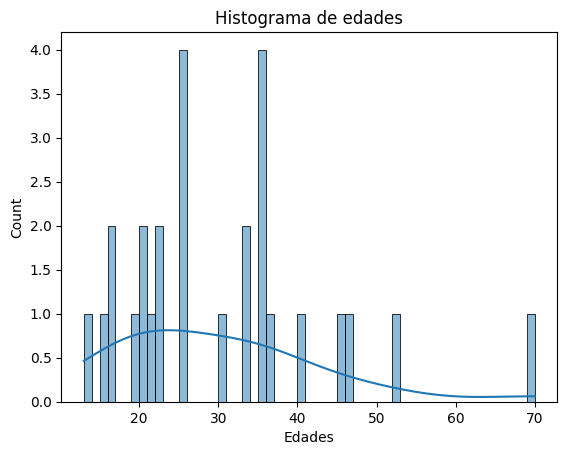

In [91]:
# Moda

import seaborn as sns
import matplotlib.pyplot as plt

histplot = sns.histplot(data=edad, x=0, binwidth=1, kde=True)
histplot.set_title("Histograma de edades")
histplot.set_xlabel("Edades")

¿Cuál es el rango medio de los datos?

In [92]:
# Midrange

print("El rango medio de los datos es:", (edad[0].min() + edad[0].max()) / 2)

El rango medio de los datos es: 41.5


Muestra un boxplot de los datos.

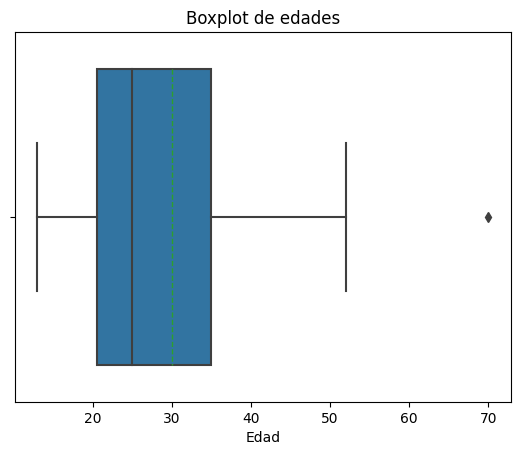

In [93]:
# Boxplot

edades_boxplot = sns.boxplot(x=edad[0], showmeans=True, meanline=True,)
edades_boxplot.set_title('Boxplot de edades')
edades_boxplot.set_xlabel('Edad')
plt.show()

¿Puedes encontrar (aproximadamente) el primer cuartil (Q1) y el tercer cuartil
(Q3) de los datos?

In [94]:
# Quartiles

print(f"Primer cuartil: {edad[0].quantile(0.25)}")
print(f"Tercer cuartil: {edad[0].quantile(0.75)}")


Primer cuartil: 20.5
Tercer cuartil: 35.0


Proporciona un resumen de los 5 números de los datos

In [95]:
# Five-number summary

print("Interquartile range:", edad[0].quantile(0.75) - edad[0].quantile(0.25))
edad[0].describe()

Interquartile range: 14.5


count    27.000000
mean     29.962963
std      12.942124
min      13.000000
25%      20.500000
50%      25.000000
75%      35.000000
max      70.000000
Name: 0, dtype: float64

¿Cuál es la diferencia entre una gráfica quantile-quantile y una de quantil?

En la gráfica de quantile, podemos observar la distribución de datos de una sola
variable, mientras que en la q-q plot podemos observar la distribución de una
variable contra la distribución de otra.


Text(0.5, 1.0, 'Quantile plot de edades')

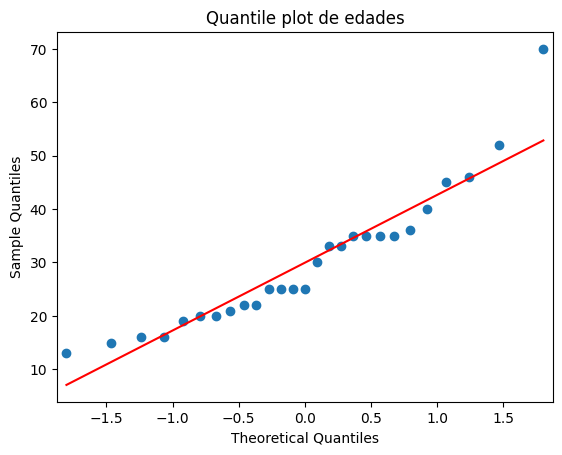

In [96]:
# Quantile plot

import statsmodels.api as sm
import matplotlib.pyplot as plt

edad_qqplot = sm.qqplot(edad[0], line='s')
plt.title('Quantile plot de edades')

2.3 Supongamos que los valores de un conjunto de datos determinado se agrupan en
intervalos. Los intervalos y frecuencias correspondientes son los siguientes:

| Edad   | Frecuencia |
|--------|------------|
| 1-5    | 200        |
| 6-15   | 450        |
| 16-20  | 300        |
| 21-50  | 1500       |
| 51-80  | 700        |
| 81-110 | 44         |

Calcule una mediana aproximada para los datos

In [97]:
edad_2 = ["1-5", "6-15", "16-20","21-50","51-80","81-110"]
frecuencia = [200, 450, 300, 1500, 700, 44]

df_1 = pd.DataFrame({'Edad': edad_2, 'Frecuencia': frecuencia})

# Calculamos la mediana acumulada (N/2), donde N es el total de datos. En este
# caso, la suma total de las frecuencias.

mediana_acumulada = df_1['Frecuencia'].sum() / 2
print("Mediana acumulada:", mediana_acumulada)

# Calculamos la mediana agrupada. Para ello, recorremos la columna de
# frecuencias y vamos sumando hasta que la suma sea mayor que la mediana
# acumulada. En ese momento, la mediana agrupada será el valor de la columna
# Edad que se encuentre en la misma fila que la frecuencia que ha hecho que la
# suma sea mayor que la mediana acumulada.

for i in range(len(df_1)):
    if df_1['Frecuencia'].cumsum()[i] > mediana_acumulada:
        mediana_agrupada = df_1['Edad'][i]
        break
    
print("Mediana agrupada:", mediana_agrupada)

# Ahora podemos calcular la mediana dentro de este intervalo.

mediana = mediana_agrupada.split('-')
mediana = (int(mediana[0]) + int(mediana[1])) / 2
print("Mediana:", mediana)

Mediana acumulada: 1597.0
Mediana agrupada: 21-50
Mediana: 35.5


2.4 Supongamos que un hospital analizó los datos de edad y grasa corporal de 18
adultos seleccionados al azar y obtuvo los siguientes resultados:

| Edad       | 23  | 23   | 27  | 27   | 39   | 41   | 47   | 49   | 50   |
|------------|-----|------|-----|------|------|------|------|------|------|
| % de grasa | 9.5 | 26.5 | 7.8 | 17.8 | 31.4 | 25.9 | 27.4 | 27.2 | 31.2 |

| Edad       | 52   | 54   | 54   | 56   | 57   | 58   | 58   | 60   | 61   |
|------------|------|------|------|------|------|------|------|------|------|
| % de grasa | 34.6 | 42.5 | 28.8 | 33.4 | 30.2 | 34.1 | 32.9 | 41.2 | 35.7 |

1. Calcula la media, mediana y desviación estándar para la edad y el porcentaje de grasa.
1. Dibuja los boxplots para las dos variables.
1. Dibuja un scatter plot y un q-q plot basado en estas dos variables


In [98]:
# Resumen de los 5 números

edad_3 = [23, 23, 27, 27,39,41,47,49,50,52,54,54,56,57,58,58,60,61]
fat_percentage = [9.5, 26.5, 7.8, 17.8, 31.4, 25.9, 27.4, 27.2, 31.2, 34.6, 42.5, 28.8, 33.4, 30.2, 34.1, 32.9, 41.2, 35.7]

df_2 = pd.DataFrame({'Edad': edad_3, 'Porcentaje de grasa': fat_percentage})
print(df_2.describe())
print("mediana", df_2["Edad"].median(), "              ",df_2["Porcentaje de grasa"].median())

            Edad  Porcentaje de grasa
count  18.000000            18.000000
mean   46.444444            28.783333
std    13.218624             9.254395
min    23.000000             7.800000
25%    39.500000            26.675000
50%    51.000000            30.700000
75%    56.750000            33.925000
max    61.000000            42.500000
mediana 51.0                30.7


Text(0, 0.5, 'Values')

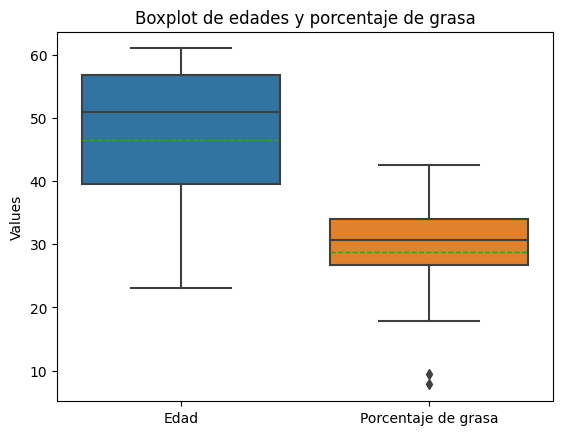

In [99]:
# 2. Boxplots de las 2 variables

boxplot_1 = sns.boxplot(data = df_2[["Edad", "Porcentaje de grasa"]], showmeans=True, meanline=True,)
boxplot_1.set_title('Boxplot de edades y porcentaje de grasa')
boxplot_1.set_ylabel('Values')

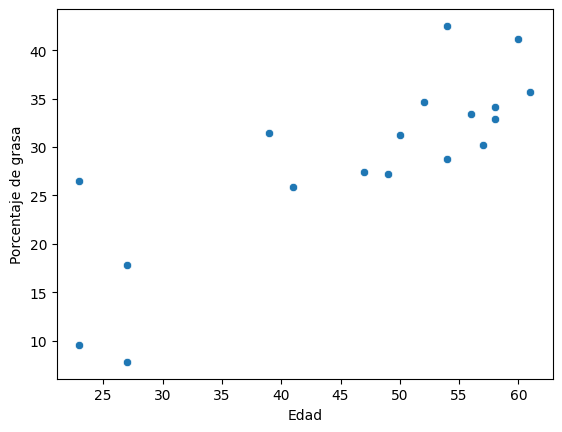

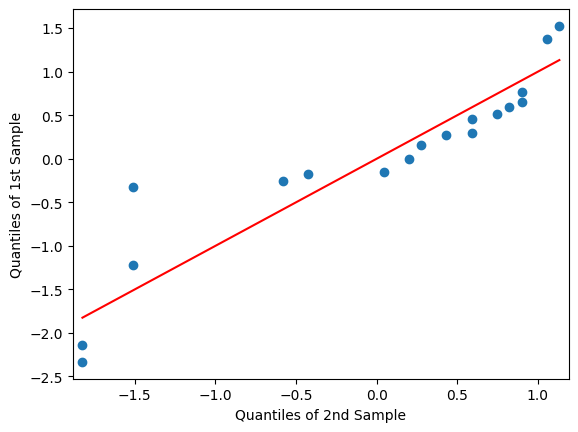

In [100]:
# 3. Scatterplot de las 2 variables

scatterplot_1 = sns.scatterplot(data = df_2, x="Edad", y="Porcentaje de grasa")

# q-q plot de las 2 variables

import statsmodels.api as sm

pp_x = sm.ProbPlot(df_2["Edad"], fit=True)
pp_y = sm.ProbPlot(df_2["Porcentaje de grasa"], fit=True)
qqplot_1 = pp_y.qqplot(line='s', other=pp_x)

2.5 Resuma brevemente cómo calcular la disimilitud entre objetos descritos a continuación:

1.  Atributos nominales
1. Atributos binarios asimétricos
1. Atributos numéricos
1. Vectores término-frecuencia



1. **Atributos nominales**: La disimilitud entre objetos con atributos nominales se
   calcula utilizando medidas de disimilitud específicas para datos categóricos,
   como la distancia de Hamming o la distancia de Jaccard. Estas medidas
   comparan la diferencia entre las categorías o etiquetas asignadas a los
   objetos y cuántas coinciden o difieren.

   Por ejemplo, supongamos que tenemos dos objetos que representan colores de
   ojos, donde uno tiene "Ojos Azules" y el otro tiene "Ojos Verdes". La
   distancia de Hamming entre estos dos objetos sería 1, ya que difieren en una
   característica.

1. **Atributos binarios asimétricos**: La disimilitud entre objetos con atributos
   binarios asimétricos se calcula utilizando medidas como la distancia de
   Jaccard o la distancia de Bray-Curtis. Estas medidas evalúan la similitud
   entre dos conjuntos binarios, teniendo en cuenta la presencia o ausencia de
   características, sin considerar la simetría.
   
   Por ejemploo, si estamos comparando la presencia de ciertas palabras clave en
   dos documentos. Uno de los documentos contiene la palabra "gato", y el otro
   contiene las palabras "perro" y "gato". La distancia de Jaccard sería 0.5, ya
   que la intersección de palabras clave (en este caso, "gato") dividida por la
   unión de palabras clave (en este caso, "perro" y "gato") es 0.5.

1. **Atributos numéricos**: La disimilitud entre objetos con atributos numéricos se
   puede calcular utilizando diversas medidas, como la distancia euclidiana, la
   distancia de Manhattan o la distancia de Mahalanobis. Estas medidas
   cuantifican la diferencia numérica entre los valores de atributos de los
   objetos.

   Supongamos que tenemos dos puntos en un plano 2D, uno en `(2, 3)` y otro en
   `(4,5)`. La distancia euclidiana entre estos dos puntos sería aproximadamente
   2.8284, que se calcula como la raíz cuadrada de la suma de las
   diferencias al cuadrado en cada dimensión `((4-2)^2 + (5-3)^2)`.

1. **Vectores término-frecuencia**: Para calcular la disimilitud entre objetos
   representados por vectores término-frecuencia, se suelen utilizar medidas de
   similitud coseno o medidas basadas en la información mutua. Estas medidas
   evalúan la similitud entre los patrones de términos y sus frecuencias en los
   vectores, midiendo la orientación y la magnitud relativa de los vectores en
   un espacio de alta dimensionalidad. Cuanto más cercanos estén los vectores,
   mayor será la similitud y menor la disimilitud.

   Consideremos dos documentos representados por vectores término-frecuencia de
   palabras clave. Si tenemos dos vectores `[2, 1, 0, 3]` y `[1, 2, 1, 2]`, la
   similitud coseno sería aproximadamente `0.7807`. La disimilitud sería `1 -
   0.7807 = 0.2193`. Estos valores se calculan utilizando el producto punto y
   la norma de los vectores.


2.6 Dados dos objetos representados por las tuplas `(22, 1, 42, 10)` y `(20, 0,
36, 8)`:

1. Calcula la distancia euclidiana entre los dos objetos
1. Calcula la distancia de Manhattan entre los dos objetos
1. Calcula la distancia de Minkowski entre los dos objetos, usando q=3
1. Calcula la distancia suprema entre los dos objetos


In [101]:
x = [22, 1, 42, 10]
y = [20, 0, 36, 8]

# Distancia euclidiana

def euclidean_distance(x, y):  
    distancia = sum((x[i] - y[i])**2 for i in range(len(x)))
    return distancia**(1/2)
    
# Distancia de Manhattan

def manhattan_distance(x, y):
    return sum(abs(x[i] - y[i]) for i in range(len(x)))

# Distancia de Minkowski

def minkowski_distance(x, y, p_value):    
    distancia_minkowski = sum(abs(x[i] - y[i])**3 for i in range(len(x)))
    return distancia_minkowski**(1/3)

# Distancia suprema

def supremum_distance(x, y):
    distancia_suprema = 0
    for i in range(len(x)):
        if abs(x[i] - y[i]) > distancia_suprema:
            distancia_suprema = abs(x[i] - y[i])
    return distancia_suprema

print(f'La distancia euclidiana es: {euclidean_distance(x, y)}')
print(f'La distancia de Manhattan es: {manhattan_distance(x, y)}')
print(f'La distancia de Minkowski es: {minkowski_distance(x, y, 3)}')
print(f'La distancia suprema es: {supremum_distance(x, y)}')

La distancia euclidiana es: 6.708203932499369
La distancia de Manhattan es: 11
La distancia de Minkowski es: 6.153449493663682
La distancia suprema es: 6


2.7 La mediana es una de las medidas integrales más importantes en el análisis de datos. Proponga varios métodos para la aproximación de la mediana. Analice su complejidad respectiva bajo diferentes configuraciones de parámetros y decida hasta qué punto se puede aproximar el valor real. Además, sugiera una estrategia heurística para equilibrar la precisión y la complejidad y luego aplíquela a todos los métodos que haya proporcionado.

1. Método de ordenamiento: Ordena el conjunto de datos y toma el valor en la
   posición central. Su complejidad es $$O(n \ log (n))$$ debido al proceso de
   ordenamiento. Puede ser preciso, pero no es eficiente en grandes conjuntos de
   datos.


1. Método de la mediana de las medianas: Divide el conjunto de datos en grupos
   más pequeños, calcula las medianas de esos grupos y luego calcula la mediana
   de esas medianas. Tiene una complejidad de $$O(n)$$ pero puede no ser tan
   preciso como el método de ordenamiento en conjuntos de datos pequeños.

1. Estimación por interpolación: Utiliza una estimación basada en la forma de la
distribución de datos alrededor de la mediana. Puede ser rápido, pero la
precisión depende de la forma de la distribución y la cantidad de datos
disponibles.

2.8 Es importante definir o seleccionar medidas de similitud en el análisis de datos. Sin embargo, no existe una medida de similitud subjetiva comúnmente aceptada. Los resultados pueden variar dependiendo de las medidas de similitud utilizadas. Sin embargo, medidas de similitud aparentemente diferentes pueden ser equivalentes después de alguna transformación. Supongamos que tenemos el siguiente conjunto de datos 2-D:

|     | A_1 | A_2 |
|-----|-----|-----|
| x_1 | 1.5 | 1.7 |
| x_2 | 2   | 1.9 |
| x_3 | 1.6 | 1.8 |
| x_4 | 1.2 | 1.5 |
| x_5 | 1.5 | 1.0 |

1. Considere los datos como puntos de datos 2-D. Dado un nuevo punto de datos,
   `x = (1.4, 1.6)` como consulta, clasifique los puntos de la base de datos
   según la similitud con la consulta utilizando la distancia euclidiana, la
   distancia de Manhattan, la distancia suprema y la similitud del coseno.

In [102]:
from numpy.linalg import norm

# Tabla de distancias y similaridad coseno

x_0 = [1.4,1.6]
x_i = [[1.5,1.7],[2,1.9],[1.6,1.8],[1.2,1.5],[1.5,1.0]]

def euclidean_distance_vp(p0, p1):
    return ((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)**(1/2)

def manhattan_distance_vp(p0, p1):
    return abs(p0[0] - p1[0]) + abs(p0[1] - p1[1])

def supremum_distance_vp(p0, p1):
    return max(abs(p0[0] - p1[0]), abs(p0[1] - p1[1]))

def cosine_similarity_vp(p0, p1):
    return sum(p0[i] * p1[i] for i in range(len(p0))) / (norm(p0) * norm(p1))

eux_table = []
manh_table= []
supr_table = []
cos_sim_table = []
for i in range(len(x_i)):
    eux_distance = euclidean_distance_vp(x_0, x_i[i])
    eux_table.append(eux_distance)
    manh_distance = manhattan_distance_vp(x_0, x_i[i])
    manh_table.append(manh_distance)
    supr_distance = supremum_distance_vp(x_0, x_i[i])
    supr_table.append(supr_distance)
    cos_similarity = cosine_similarity_vp(x_0, x_i[i])
    cos_sim_table.append(cos_similarity)
    
distances_table = pd.DataFrame({
    'Euclidean': eux_table,
    'Manhattan': manh_table,
    'Supremum': supr_table,
    'Cosine similarity': cos_sim_table
    }, index=['x1', 'x2', 'x3', 'x4', 'x5'])

print(f"Tabla de distancias y similaridad coseno \n {distances_table}")

print('\nTabla de distancias y similaridad coseno ordenada \n',
    distances_table[['Euclidean', 'Manhattan', 'Supremum', 'Cosine similarity' ]].rank(ascending=True))


Tabla de distancias y similaridad coseno 
     Euclidean  Manhattan  Supremum  Cosine similarity
x1   0.141421        0.2       0.1           0.999991
x2   0.670820        0.9       0.6           0.995752
x3   0.282843        0.4       0.2           0.999969
x4   0.223607        0.3       0.2           0.999028
x5   0.608276        0.7       0.6           0.965363

Tabla de distancias y similaridad coseno ordenada 
     Euclidean  Manhattan  Supremum  Cosine similarity
x1        1.0        1.0       1.0                5.0
x2        5.0        5.0       4.5                2.0
x3        3.0        3.0       3.0                4.0
x4        2.0        2.0       2.0                3.0
x5        4.0        4.0       4.5                1.0


1. Normalice el conjunto de datos para que la norma de cada punto de datos sea igual a 1. Utilice la distancia euclidiana en los datos transformados para clasificar los puntos de datos.

In [103]:
# Datos normalizados

import numpy as np

normalized_x_0 = np.array(x_0) / np.linalg.norm(x_0)
df_xi = pd.DataFrame(x_i, columns=['A_1', 'A_2'], index=['x1', 'x2', 'x3', 'x4', 'x5'])
normalized_x_i = df_xi.apply(lambda x: x / np.linalg.norm(x), axis=1)

print(f'x_0 normalizado: \n {normalized_x_0} \n')
print(f'x_i normalizado: \n {normalized_x_i}')

# Tabla de distancias normalizadas

eux_table_2 = []
for i in range(len(normalized_x_i)):
    eux_distance = euclidean_distance_vp(
        normalized_x_0, normalized_x_i.loc[f'x{str(i + 1)}']
    )
    eux_table_2.append(eux_distance)

distances_table_2 = pd.DataFrame(eux_table_2, columns=['Euclidean'], index=['x1', 'x2', 'x3', 'x4', 'x5'])
distances_table_2['Ranking'] = distances_table_2.rank(ascending=True)
print(f"\n Tabla de distancias normalizadas \n {distances_table_2}")

x_0 normalizado: 
 [0.65850461 0.75257669] 

x_i normalizado: 
          A_1       A_2
x1  0.661622  0.749838
x2  0.724999  0.688749
x3  0.664364  0.747409
x4  0.624695  0.780869
x5  0.832050  0.554700

 Tabla de distancias normalizadas 
     Euclidean  Ranking
x1   0.004149      1.0
x2   0.092171      4.0
x3   0.007812      2.0
x4   0.044085      3.0
x5   0.263198      5.0
